In [1]:
## Poisson Equation
## Load Packages
from fenics import *
from mshr import *
# Load FEniCS
# Plotting Libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.transforms as trans
import matplotlib.gridspec as gridspec


In [2]:
# Define geometric parameters
inner_radius = 0.5
outer_radius = 2.5
length = 1.0  # Length of the cable

In [3]:
# Create mesh
domain = Circle(Point(0, 0), outer_radius) - Circle(Point(0, 0), inner_radius)

In [4]:
mesh = generate_mesh(domain, 64)
V = FunctionSpace(mesh, 'P', 1)

In [5]:
# Define subdomains
class InnerRegion(SubDomain):
    def inside(self, x, on_boundary):
        return inner_radius - DOLFIN_EPS <= sqrt(x[0]**2 + x[1]**2) <= outer_radius + DOLFIN_EPS

class OuterRegion(SubDomain):
    def inside(self, x, on_boundary):
        return sqrt(x[0]**2 + x[1]**2) > outer_radius - DOLFIN_EPS

# Create MeshFunction to mark subdomains
subdomains = MeshFunction('size_t', mesh, mesh.topology().dim())
subdomains.set_all(0)

inner_region = InnerRegion()
outer_region = OuterRegion()

inner_region.mark(subdomains, 1)  # Mark inner region
outer_region.mark(subdomains, 2)  # Mark outer region

In [6]:
# Define boundaries
class InnerBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return sqrt(x[0]**2 + x[1]**2) < inner_radius + DOLFIN_EPS and on_boundary

class OuterBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return sqrt(x[0]**2 + x[1]**2) > outer_radius - DOLFIN_EPS and on_boundary

# Create MeshFunction to mark boundaries
boundaries = MeshFunction('size_t', mesh, mesh.topology().dim() - 1)
boundaries.set_all(0)

inner_boundary = InnerBoundary()
outer_boundary = OuterBoundary()

inner_boundary.mark(boundaries, 1)  # Mark inner boundary
outer_boundary.mark(boundaries, 2)  # Mark outer boundary

In [7]:
# Define boundary conditions
bc_inner = DirichletBC(V, Constant('5.0'), boundaries, 1)
bc_outer = DirichletBC(V, Constant('0.0'), boundaries, 2)

# Apply boundary conditions
bcs = [bc_inner, bc_outer]


In [8]:
dx = Measure('dx', domain=mesh, subdomain_data=subdomains)
u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(u), grad(v)) * dx
L = Constant('0') * v * dx
u = Function(V)
solve(a == L, u, bcs)

Solving linear variational problem.
  *** Warning: Found no facets matching domain for boundary condition.


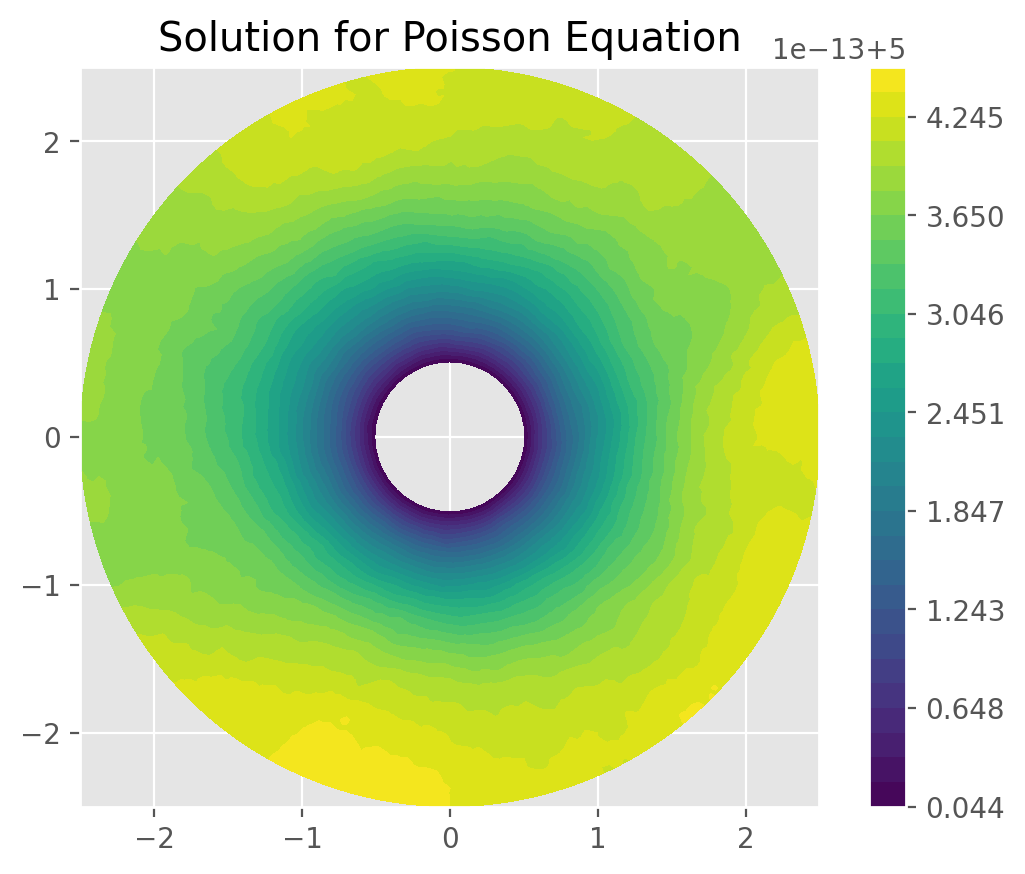

In [9]:
## Plotting the solution.
plt.figure(dpi=200)                       # Set the resolution
plt.style.use('ggplot')                   # Use the ggplot style
plot(u, title = 'Solution')              # Set the title
plt.colorbar(plot(u, title="Solution for Poisson Equation")) # Add a colorbar
#plt.savefig('Poisson_Sol.png',dpi=200) # Savefig
plt.show()

In [17]:
u(2.5,0)

5.000000000000432

Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


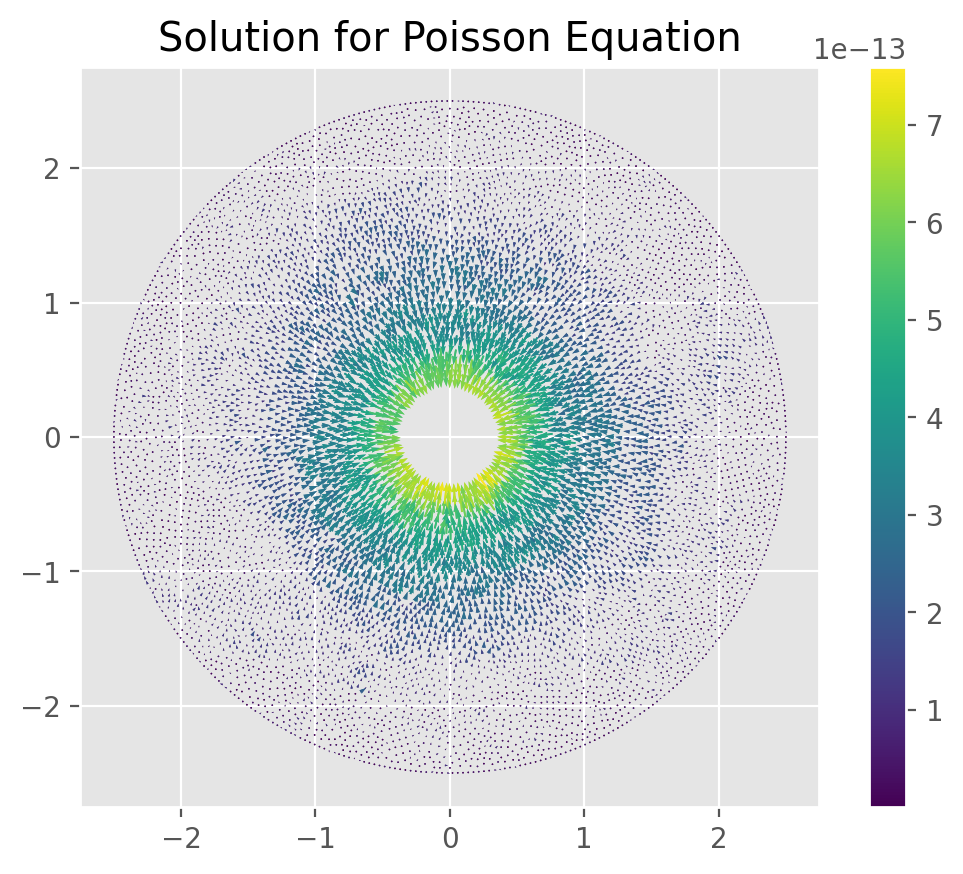

In [22]:
e_field = -grad(u)
## Plotting the solution.
plt.figure(dpi=200)                       # Set the resolution
plt.style.use('ggplot')                   # Use the ggplot style
plot(e_field, title = 'Solution')              # Set the title
plt.colorbar(plot(e_field, title="Solution for Poisson Equation")) # Add a colorbar
#plt.savefig('Poisson_Sol.png',dpi=200) # Savefig
plt.show()          # Set the title
